In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime as dt
import math
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import json

In [2]:
july = pd.read_csv('../data/july.csv/july.csv')

In [3]:
july.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [4]:
july_scooters = july.loc[july.sumdgroup.isin(['scooter', 'Scooter'])]

In [5]:
july_scooters = july_scooters[[ 'companyname', 'sumdid', 'chargelevel','pubdatetime', 'latitude', 'longitude']]

In [6]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   companyname  object 
 1   sumdid       object 
 2   chargelevel  float64
 3   pubdatetime  object 
 4   latitude     float64
 5   longitude    float64
dtypes: float64(3), object(3)
memory usage: 1.3+ GB


In [7]:
july_scooters.to_pickle("../data/july.pkl")

In [8]:
july_scooters.pubdatetime = pd.to_datetime(july_scooters.pubdatetime)

In [9]:
july_scooters.head()

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude
0,Lyft,Powered635135,22.0,2019-07-01 00:00:33.550,36.156678,-86.809004
1,Lyft,Powered790946,33.0,2019-07-01 00:00:34.973,36.145674,-86.794138
2,Lyft,Powered570380,76.0,2019-07-01 00:00:41.183,36.179319,-86.751538
3,Lyft,Powered240631,43.0,2019-07-01 00:00:41.620,36.152111,-86.803821
4,Lyft,Powered970404,52.0,2019-07-01 00:00:45.087,36.149355,-86.797550


In [10]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ GB


In [11]:
july_scooters['date'] = july_scooters['pubdatetime'].dt.date

In [12]:
july_scooters.date = pd.to_datetime(july_scooters.date)

To round down to closest 15, this should work

15 * math.floor(number/15)


In [13]:
july_scooters.isnull().sum()

companyname      0
sumdid           0
chargelevel    202
pubdatetime      0
latitude         0
longitude        0
date             0
dtype: int64

In [14]:
july_scooters = july_scooters.dropna()

In [15]:
july_scooters

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date
0,Lyft,Powered635135,22.00,2019-07-01 00:00:33.550,36.156678,-86.809004,2019-07-01
1,Lyft,Powered790946,33.00,2019-07-01 00:00:34.973,36.145674,-86.794138,2019-07-01
2,Lyft,Powered570380,76.00,2019-07-01 00:00:41.183,36.179319,-86.751538,2019-07-01
3,Lyft,Powered240631,43.00,2019-07-01 00:00:41.620,36.152111,-86.803821,2019-07-01
4,Lyft,Powered970404,52.00,2019-07-01 00:00:45.087,36.149355,-86.797550,2019-07-01
...,...,...,...,...,...,...,...
25075440,Bolt,Powered-1a8321d0-5c21-04a4-bd7d-7b96ba51f17b,100.00,2019-07-31 23:59:57.000,36.162420,-86.779314,2019-07-31
25075441,Bolt,Powered-bd4ba83b-513f-ed5c-3c51-b4f51e7fdc51,100.00,2019-07-31 23:59:57.000,36.146010,-86.810197,2019-07-31
25075442,Bolt,Powered-cc9c0b7e-2b9e-def9-e48b-1a8a489c4daf,71.68,2019-07-31 23:59:57.000,36.165837,-86.777765,2019-07-31
25075443,Bolt,Powered-55a7ac02-7e17-bb3b-130d-b160d9776405,0.00,2019-07-31 23:59:57.000,36.149792,-86.806818,2019-07-31


In [16]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066322 entries, 0 to 25075444
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
 6   date         datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 1.5+ GB


In [17]:
july_scooters['date'] = july_scooters['pubdatetime'].dt.date

In [18]:
july_scooters['hour'] = july_scooters['pubdatetime'].dt.hour

In [19]:
july_scooters['minute'] = july_scooters['pubdatetime'].dt.minute

In [20]:
july_scooters.head()

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date,hour,minute
0,Lyft,Powered635135,22.0,2019-07-01 00:00:33.550,36.156678,-86.809004,2019-07-01,0,0
1,Lyft,Powered790946,33.0,2019-07-01 00:00:34.973,36.145674,-86.794138,2019-07-01,0,0
2,Lyft,Powered570380,76.0,2019-07-01 00:00:41.183,36.179319,-86.751538,2019-07-01,0,0
3,Lyft,Powered240631,43.0,2019-07-01 00:00:41.620,36.152111,-86.803821,2019-07-01,0,0
4,Lyft,Powered970404,52.0,2019-07-01 00:00:45.087,36.149355,-86.797550,2019-07-01,0,0


In [21]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066322 entries, 0 to 25075444
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
 6   date         object        
 7   hour         int64         
 8   minute       int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ GB


In [22]:
july_scooters['roundedtime'] = july_scooters['minute'].apply(lambda x: 15*round(x/15))

In [23]:
july_scooters = july_scooters.round({'latitude': 3})

In [24]:
july_scooters = july_scooters.round({'longitude': 3})

In [25]:
july_scooters

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date,hour,minute,roundedtime
0,Lyft,Powered635135,22.00,2019-07-01 00:00:33.550,36.157,-86.809,2019-07-01,0,0,0
1,Lyft,Powered790946,33.00,2019-07-01 00:00:34.973,36.146,-86.794,2019-07-01,0,0,0
2,Lyft,Powered570380,76.00,2019-07-01 00:00:41.183,36.179,-86.752,2019-07-01,0,0,0
3,Lyft,Powered240631,43.00,2019-07-01 00:00:41.620,36.152,-86.804,2019-07-01,0,0,0
4,Lyft,Powered970404,52.00,2019-07-01 00:00:45.087,36.149,-86.798,2019-07-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25075440,Bolt,Powered-1a8321d0-5c21-04a4-bd7d-7b96ba51f17b,100.00,2019-07-31 23:59:57.000,36.162,-86.779,2019-07-31,23,59,60
25075441,Bolt,Powered-bd4ba83b-513f-ed5c-3c51-b4f51e7fdc51,100.00,2019-07-31 23:59:57.000,36.146,-86.810,2019-07-31,23,59,60
25075442,Bolt,Powered-cc9c0b7e-2b9e-def9-e48b-1a8a489c4daf,71.68,2019-07-31 23:59:57.000,36.166,-86.778,2019-07-31,23,59,60
25075443,Bolt,Powered-55a7ac02-7e17-bb3b-130d-b160d9776405,0.00,2019-07-31 23:59:57.000,36.150,-86.807,2019-07-31,23,59,60


In [26]:
agg_time_scooters = july_scooters.loc[:,["latitude", "longitude", "date", "hour", "roundedtime", "sumdid"]]\
    .groupby(["latitude", "longitude", "date", "hour", "roundedtime"])\
    .agg({"sumdid": pd.Series.nunique})\
    .reset_index()


In [27]:
agg_time_scooters.head()

,latitude,longitude,date,hour,roundedtime,sumdid
0,0.0,0.0,2019-07-01,18,45,1
1,0.0,0.0,2019-07-01,18,60,1
2,0.0,0.0,2019-07-01,19,0,1
3,0.0,0.0,2019-07-01,19,15,1
4,0.0,0.0,2019-07-01,19,30,1


In [28]:
agg_time_scooters.drop(agg_time_scooters.loc[agg_time_scooters['latitude']==0].index, inplace=True)

In [29]:
agg_time_scooters

,latitude,longitude,date,hour,roundedtime,sumdid
3627,26.119,-80.139,2019-07-01,18,45,1
3628,26.119,-80.139,2019-07-01,18,60,1
3629,26.119,-80.139,2019-07-01,19,0,1
3630,26.119,-80.139,2019-07-01,19,15,1
3631,26.119,-80.139,2019-07-01,19,30,1
...,...,...,...,...,...,...
2638337,3609874.117,-86.777,2019-07-16,13,15,1
2638338,3609874.117,-86.777,2019-07-16,13,30,1
2638339,3609874.117,-86.777,2019-07-16,13,45,1
2638340,3609874.117,-86.777,2019-07-16,13,60,1


In [30]:
agg_time_scooters.sort_values('sumdid', ascending = False).head(10)

,latitude,longitude,date,hour,roundedtime,sumdid
103936,36.12,-86.753,2019-07-26,9,15,776
103672,36.12,-86.753,2019-07-24,4,30,774
103673,36.12,-86.753,2019-07-24,4,45,772
103935,36.12,-86.753,2019-07-26,9,0,771
103676,36.12,-86.753,2019-07-24,5,15,770
103938,36.12,-86.753,2019-07-26,9,45,769
103937,36.12,-86.753,2019-07-26,9,30,768
103312,36.12,-86.753,2019-07-21,4,30,768
103313,36.12,-86.753,2019-07-21,4,45,768
103677,36.12,-86.753,2019-07-24,5,30,767


In [31]:
agg_time_scooters.drop(agg_time_scooters.loc[(agg_time_scooters['latitude']==36.12) & (agg_time_scooters['longitude'] == -86.753)].index, inplace=True)

In [32]:
agg_time_scooters.drop(agg_time_scooters.loc[(agg_time_scooters['latitude']==36.12) & (agg_time_scooters['longitude'] == -86.754)].index, inplace=True)

In [33]:
agg_time_scooters.sort_values('sumdid', ascending = False).head(10000)

,latitude,longitude,date,hour,roundedtime,sumdid
122543,36.121,-86.770,2019-07-02,13,60,149
122545,36.121,-86.770,2019-07-02,14,15,148
122542,36.121,-86.770,2019-07-02,13,45,148
122546,36.121,-86.770,2019-07-02,14,30,147
122544,36.121,-86.770,2019-07-02,14,0,147
...,...,...,...,...,...,...
10757,33.793,-84.403,2019-07-25,21,15,36
1759974,36.161,-86.777,2019-07-14,20,15,36
1307951,36.154,-86.785,2019-07-16,23,15,36
1655349,36.159,-86.777,2019-07-12,0,45,36


df= unique scooters, lat & long, date , hour, roundtime

In [34]:
agg_time_scooters.drop(agg_time_scooters.loc[agg_time_scooters['sumdid']>50].index, inplace=True)

In [35]:
agg_time_scooters.sort_values('sumdid', ascending = False)

,latitude,longitude,date,hour,roundedtime,sumdid
1617533,36.158,-86.746,2019-07-03,20,45,50
1618695,36.158,-86.746,2019-07-13,13,0,50
1354921,36.155,-86.785,2019-07-01,11,60,50
1354926,36.155,-86.785,2019-07-01,12,60,50
1354931,36.155,-86.785,2019-07-01,13,60,50
...,...,...,...,...,...,...
1072867,36.151,-86.784,2019-07-10,19,60,1
1072864,36.151,-86.784,2019-07-10,19,15,1
1072848,36.151,-86.784,2019-07-10,16,0,1
1072844,36.151,-86.784,2019-07-10,15,15,1


In [36]:
agg_time_scooters.sort_values('sumdid', ascending = True)

,latitude,longitude,date,hour,roundedtime,sumdid
3627,26.119,-80.139,2019-07-01,18,45,1
1502202,36.157,-86.785,2019-07-04,8,60,1
1502201,36.157,-86.785,2019-07-04,8,45,1
1502200,36.157,-86.785,2019-07-04,8,30,1
1502199,36.157,-86.785,2019-07-04,8,15,1
...,...,...,...,...,...,...
1355655,36.155,-86.785,2019-07-07,14,45,50
1618029,36.158,-86.746,2019-07-07,23,60,50
1617371,36.158,-86.746,2019-07-02,12,15,50
1617369,36.158,-86.746,2019-07-02,11,60,50


Create 2 dataframes: 1 weekends the other weekdays
1- reformat days to group
2

In [37]:
agg_time_scooters['date']=pd.to_datetime(agg_time_scooters.date)

In [38]:
agg_time_scooters['day_of_week'] = agg_time_scooters.date.dt.strftime("%w")

In [39]:
agg_time_scooters.head()

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
3627,26.119,-80.139,2019-07-01,18,45,1,1
3628,26.119,-80.139,2019-07-01,18,60,1,1
3629,26.119,-80.139,2019-07-01,19,0,1,1
3630,26.119,-80.139,2019-07-01,19,15,1,1
3631,26.119,-80.139,2019-07-01,19,30,1,1


In [40]:
agg_time_scooters['day_of_week'] = agg_time_scooters.day_of_week.astype(int)

In [41]:
weekend_scooters = agg_time_scooters[agg_time_scooters['day_of_week'].isin([6,0])]

In [42]:
weekday_scooters = agg_time_scooters[agg_time_scooters['day_of_week'].isin([1,2,3,4,5])]

In [43]:
weekend_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
4134,26.119,-80.139,2019-07-06,0,0,1,6
4135,26.119,-80.139,2019-07-06,0,15,1,6
4136,26.119,-80.139,2019-07-06,0,30,1,6
4137,26.119,-80.139,2019-07-06,0,45,1,6
4138,26.119,-80.139,2019-07-06,0,60,1,6
...,...,...,...,...,...,...,...
2638144,37.058,-94.287,2019-07-07,23,0,1,0
2638145,37.058,-94.287,2019-07-07,23,15,1,0
2638146,37.058,-94.287,2019-07-07,23,30,1,0
2638147,37.058,-94.287,2019-07-07,23,45,1,0


In [44]:
weekday_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
3627,26.119,-80.139,2019-07-01,18,45,1,1
3628,26.119,-80.139,2019-07-01,18,60,1,1
3629,26.119,-80.139,2019-07-01,19,0,1,1
3630,26.119,-80.139,2019-07-01,19,15,1,1
3631,26.119,-80.139,2019-07-01,19,30,1,1
...,...,...,...,...,...,...,...
2638337,3609874.117,-86.777,2019-07-16,13,15,1,2
2638338,3609874.117,-86.777,2019-07-16,13,30,1,2
2638339,3609874.117,-86.777,2019-07-16,13,45,1,2
2638340,3609874.117,-86.777,2019-07-16,13,60,1,2


In [45]:
agg_time_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622080 entries, 3627 to 2638341
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   latitude     float64       
 1   longitude    float64       
 2   date         datetime64[ns]
 3   hour         int64         
 4   roundedtime  int64         
 5   sumdid       int64         
 6   day_of_week  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 150.0 MB


In [46]:
weekend_scooters['geometry'] = weekend_scooters.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
weekend_scooters.head(3)

C:\Users\ferralme\AppData\Local\Temp/ipykernel_16156/1441982155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_scooters['geometry'] = weekend_scooters.apply(lambda x: Point((x.longitude,


,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry
4134,26.119,-80.139,2019-07-06,0,0,1,6,POINT (-80.139 26.119)
4135,26.119,-80.139,2019-07-06,0,15,1,6,POINT (-80.139 26.119)
4136,26.119,-80.139,2019-07-06,0,30,1,6,POINT (-80.139 26.119)


In [47]:
weekend_scooters = gpd.GeoDataFrame(weekend_scooters, 
                           crs = 'EPSG:4326', 
                           geometry = weekend_scooters['geometry'])
weekend_scooters.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 678006 entries, 4134 to 2638148
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   latitude     678006 non-null  float64       
 1   longitude    678006 non-null  float64       
 2   date         678006 non-null  datetime64[ns]
 3   hour         678006 non-null  int64         
 4   roundedtime  678006 non-null  int64         
 5   sumdid       678006 non-null  int64         
 6   day_of_week  678006 non-null  int32         
 7   geometry     678006 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(1), int64(3)
memory usage: 44.0 MB


In [48]:
weekend_scooters['latitude'].isnull().count()

678006

In [49]:
weekend_scooters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 678006 entries, 4134 to 2638148
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   latitude     678006 non-null  float64       
 1   longitude    678006 non-null  float64       
 2   date         678006 non-null  datetime64[ns]
 3   hour         678006 non-null  int64         
 4   roundedtime  678006 non-null  int64         
 5   sumdid       678006 non-null  int64         
 6   day_of_week  678006 non-null  int32         
 7   geometry     678006 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(1), int64(3)
memory usage: 44.0 MB


In [50]:
type(weekend_scooters)

geopandas.geodataframe.GeoDataFrame

In [51]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [52]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
weekend_scooters_july = gpd.GeoDataFrame(weekend_scooters, 
                           crs = zipcodes.crs, 
                           geometry = weekend_scooters['geometry'])

<AxesSubplot:>

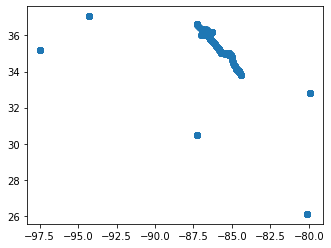

In [54]:
weekend_scooters_july.plot()

In [55]:
type(weekend_scooters_july)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

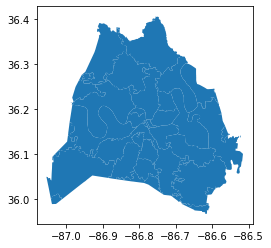

In [56]:
zipcodes.plot()

In [57]:
weekend_july_map = gpd.sjoin(weekend_scooters_july, zipcodes, op = 'within')

In [58]:
weekend_july_map.head()

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
22289,36.001,-87.027,2019-07-27,21,45,1,6,POINT (-87.02700 36.00100),4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305
22290,36.001,-87.027,2019-07-27,21,60,1,6,POINT (-87.02700 36.00100),4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305
22298,36.005,-86.692,2019-07-14,1,45,1,0,POINT (-86.69200 36.00500),14,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508
22299,36.005,-86.692,2019-07-14,1,60,1,0,POINT (-86.69200 36.00500),14,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508
22300,36.005,-86.692,2019-07-14,2,0,1,0,POINT (-86.69200 36.00500),14,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508


In [59]:
area_center = [36.23245257407244, -86.77676762469858]

ax = weekend_july_map.plot(figsize = (8, 10), color = 'blue')
weekend_scooters_july_map.plot( ax = ax, column = 'geometry');
plt.show();

In [60]:
weekend_scooters_july_map = folium.Map(location =  area_center, zoom_start = 12)
weekend_scooters_july_map

weekend_scooters_july['date'] = weekend_scooters_july.date.astype(object)

In [61]:
weekend_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry
4134,26.119,-80.139,2019-07-06,0,0,1,6,POINT (-80.13900 26.11900)
4135,26.119,-80.139,2019-07-06,0,15,1,6,POINT (-80.13900 26.11900)
4136,26.119,-80.139,2019-07-06,0,30,1,6,POINT (-80.13900 26.11900)
4137,26.119,-80.139,2019-07-06,0,45,1,6,POINT (-80.13900 26.11900)
4138,26.119,-80.139,2019-07-06,0,60,1,6,POINT (-80.13900 26.11900)
...,...,...,...,...,...,...,...,...
2638144,37.058,-94.287,2019-07-07,23,0,1,0,POINT (-94.28700 37.05800)
2638145,37.058,-94.287,2019-07-07,23,15,1,0,POINT (-94.28700 37.05800)
2638146,37.058,-94.287,2019-07-07,23,30,1,0,POINT (-94.28700 37.05800)
2638147,37.058,-94.287,2019-07-07,23,45,1,0,POINT (-94.28700 37.05800)


In [62]:
wknd_scoot_july = HeatMap(weekend_scooters['geometry']).add_to(weekend_scooters_july_map)
wknd_scoot_july
weekend_scooters_july_map.save("output.html")

TypeError: 'Point' object is not subscriptable

In [ ]:
display(wknd_scoot_july)

In [ ]:
weekend_scooters.plot()

In [ ]:
wknd_scoot_july_fmc = folium.Map(location =  area_center, zoom_start = 12)

locations = weekend_scooters[['latitude','longitude']].values.tolist()
wknd_scoot_july_fmc.add_child(
    FastMarkerCluster(locations)
)
wknd_scoot_july_fmc
wknd_scoot_july_fmc.save("wknd_july.html")

In [ ]:
wkdy_scoot_july_fmc = folium.Map(location =  area_center, zoom_start = 12)

locations = weekday_scooters[['latitude','longitude']].values.tolist()
wkdy_scoot_july_fmc.add_child(
    FastMarkerCluster(locations)
)
wkdy_scoot_july_fmc
wkdy_scoot_july_fmc.save("wkdy_july.html")

In [ ]:
weekend_scooters.info()

wknd_scoot_may_c = folium.Map(location =  area_center, zoom_start = 12)
marker_cluster = MarkerCluster().add_to(wknd_scoot_may_c)
#folium.GeoJson.add_to(wknd_scoot_may_c)
for row_index, row_values in weekend_scooters.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['sumdid'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)
wknd_scoot_may_c.save("wknd_scoot.html")   

for ind, row in agg_time_scooters.iterrows():
    print('working on row: ', ind)
    if row['day_of_week'] >= 5:
        agg_time_scooters.loc[ind, 'Week_part'] = 'Weekend'
    elif row['day_of_week'] <= 5:
        agg_time_scooters.loc[ind, 'day_of_week'] ='Weekday'
    else:
        agg_time_scooters.loc[ind, 'day_of_week'] ='NA'
print('finished!')

pivot = pd.pivot_table(may_scooters, values = 'sumdid', index ='roundedtime', aggfunc =pd.Series.nunique)
pivot

may_scooters.companyname.value_counts()

may_scooters = may_scooters[['sumdid', 'companyname','date','time','latitude', 'longitude', 'chargelevel']]

bird_scooters_may = may_scooters.loc[may_scooters['companyname'] == 'Bird'].sum()
df.pivot(index='foo', columns='bar', values='baz')